<a href="https://colab.research.google.com/github/Collin-Campbell/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

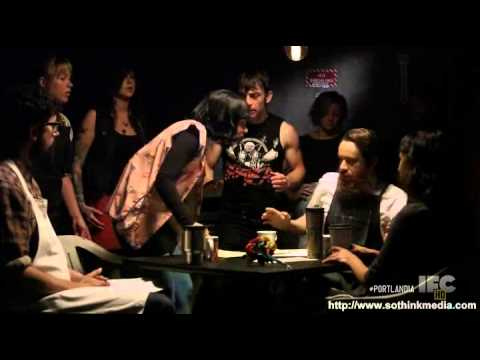

In [92]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [93]:
%pwd

'/content'

In [94]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-12-02 00:56:28--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-12-02 00:56:28 (8.38 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 72.8MB/s 
     |████████████████████████████████| 1.6MB 44.2MB/s 
     |████████████████████████████████| 10.4MB 23.8MB/s 
     |████████████████████████████████| 7.1MB 21.0MB/s 
     |████████████████████████████████| 215kB 53.0MB/s 
     |████████████████████████████████| 2.2MB 44.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.

In [95]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=4d16e13320e6c5e196a8387997e97b16cf0c8305f1d6053dfb98679461c23cee
  Stored in directory: /tmp/pip-ephem-wheel-cache-sgqyqz48/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [96]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [97]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [98]:
# Coffee shop names column looks good!

shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [99]:
# Ratings column needs some cleaning...

shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [100]:
# Dropping words and spaces in rating column, then converting into integer

shops['star_rating'] = shops['star_rating'].str.replace(' star rating', '').str.strip().astype(float).astype(int)

In [101]:
# Reviews column needs some cleaning...

shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [102]:
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    stop_words = {'a','about','above','after','again','against','ain','all','am',
                  'an','and','any','are','aren',"aren't",'as','at','be','because',
                  'been','before','being','below','between','both','but','by','can',
                  'couldn',"couldn't",'d','did','didn',"didn't",'do','does','doesn',
                  "doesn't",'doing','don',"don't",'down','during','each','few',
                  'for','from','further','had','hadn',"hadn't",'has','hasn',
                  "hasn't",'have','haven',"haven't",'having','he','her','here',
                  'hers','herself','him','himself','his','how','i','if','in',
                  'into','is','isn',"isn't",'it',"it's",'its','itself','just',
                  'll','m','ma','me','mightn',"mightn't",'more','most','mustn',
                  "mustn't",'my','myself','needn',"needn't",'no','nor','not',
                  'now','o','of','off','on','once','only','or','other','our',
                  'ours','ourselves','out','over','own','re','s','same','shan',
                  "shan't",'she',"she's",'should',"should've",'shouldn',"shouldn't",
                  'so','some','such','t','than','that',"that'll",'the','their',
                  'theirs','them','themselves','then','there','these','they',
                  'this','those','through','to','too','under','until','up','ve',
                  'very','was','wasn',"wasn't",'we','were','weren',"weren't",
                  'what','when','where','which','while','who','whom','why','will',
                  'with','won',"won't",'wouldn',"wouldn't",'y','you',"you'd",
                  "you'll","you're","you've",'your','yours','yourself','yourselves',''}

    # make all text lower case
    text = text.lower()

    # remove 'check-in'
    text = text.replace('check-in', '')

    # split into tokens using whitespaces 
    tokens = text.split(" ")

    # remove dates and times
    tokens = list(filter(
    lambda x: not re.match('^(?:(?:[0-9]{2}[:\/,]){2}[0-9]{2,4}|am|pm)$', x),
    tokens))

    # remove non-alpha (getting rid of numbers and punctuation)
    cleaned_tokens = []
    for item in tokens:
      z = re.sub('[^a-zA-Z]', '', item)
      cleaned_tokens.append(z)
    
    # remove stopwords
    super_cleaned_tokens = list(filter(lambda w: not w in stop_words, cleaned_tokens))

    # remove duplicates
    super_cleaned_tokens = list(set(super_cleaned_tokens))
    
    return super_cleaned_tokens

In [103]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [104]:
shops['tokens'][0]

['streamlined',
 'style',
 'listing',
 'every',
 'got',
 'matcha',
 'art',
 'fantastico',
 'drink',
 'wine',
 'possibilities',
 'love',
 'ordered',
 'system',
 'sweetness',
 'pretty',
 'coffee',
 'hoping',
 'latte',
 'ideas',
 'ipad',
 'ranged',
 'getting',
 'may',
 'ordering',
 'beverage',
 'shop',
 'atmosphere',
 'included',
 'corner',
 'swings',
 'level',
 'minutes',
 'heart',
 'within',
 'found',
 'feather',
 'selections',
 'loved',
 'typical',
 'desired',
 'muy',
 'checkout']

In [105]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[streamlined, style, listing, every, got, matc..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[night, instagramworthy, beautiful, cost, nice..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[ample, ipads, shared, photos, fluffy, pick, l..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[mix, pleasant, feels, got, shot, average, tab..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[grop, factory, dishes, since, photos, user, p..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [106]:
mask = shops['star_rating'] > 3

df_good = shops[mask]
df_bad = shops[~mask]

In [107]:
df_good.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[streamlined, style, listing, every, got, matc..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[night, instagramworthy, beautiful, cost, nice..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[ample, ipads, shared, photos, fluffy, pick, l..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[grop, factory, dishes, since, photos, user, p..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4,"[factory, anything, night, pricey, got, cozy, ..."


In [108]:
df_bad.head()

,coffee_shop_name,full_review_text,star_rating,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[mix, pleasant, feels, got, shot, average, tab..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3,"[ample, ipads, lets, less, collaborative, meh,..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3,"[app, hang, surrounding, expected, restroom, f..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3,"[factory, appeal, hang, cute, innovative, insi..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1,"[thats, shellshocked, make, inflated, less, vi..."


In [116]:
def count(docs):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """

    word_counts = Counter()
    appears_in = Counter()
      
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [117]:
wc_good = count(df_good['tokens'])
wc_bad = count(df_bad['tokens'])

In [118]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,coffee,3933,3933,1.0,0.014369,0.014369,0.640554
97,place,2939,2939,2.0,0.010738,0.025107,0.478664
136,great,2492,2492,3.0,0.009105,0.034212,0.405863
225,good,2192,2192,4.0,0.008009,0.042220,0.357003
206,like,1559,1559,5.0,0.005696,0.047916,0.253909


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


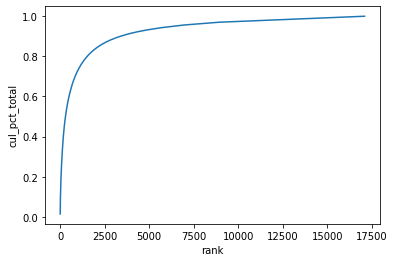

In [120]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_good);

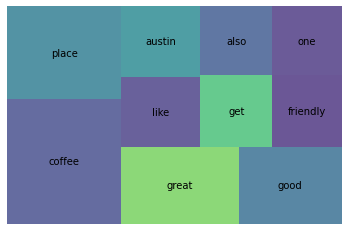

In [125]:
import squarify
import matplotlib.pyplot as plt

wc_good_top20 = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [119]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18,coffee,944,944,1.0,0.012297,0.012297,0.639566
13,place,720,720,2.0,0.009379,0.021676,0.487805
27,good,596,596,3.0,0.007764,0.029440,0.403794
16,like,565,565,4.0,0.007360,0.036800,0.382791
158,get,417,417,5.0,0.005432,0.042232,0.282520


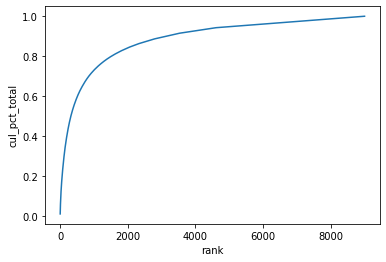

In [121]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_bad);

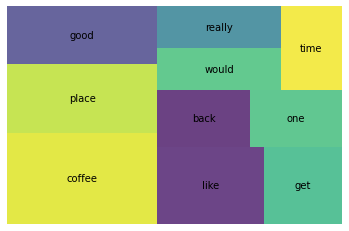

In [124]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [108]:
# above

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

